In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint 

In [ ]:
def x_heaviside(t, thresh1, thresh2):
    if t < thresh1: return 1; 
    elif thresh1 < t < thresh2: return 2;
    else: return 4; 


def SimpleGeneRegulationTime(x, t, x_target,
                             s_x_time_on1,s_x_time_on2, 
                             alpha_x = 100): 
    #Parameters for X ODE 
    s_x_value = alpha_x*x_target #Rate of production to get steady state value equal to Xtarget
    
    #Individual Rates for X  
    rate_production_x = s_x_value*x_heaviside(t, s_x_time_on1, s_x_time_on2) 
    rate_decay_x = alpha_x * x 

    #ODE for species X
    x_ode = rate_production_x - rate_decay_x
    return x_ode

def SimpleGeneRegulationSpecies(y, t, x, y_target, s_x_time_on1, s_x_time_on2, y_alpha): 
    #Parameters for X ODE 
    s_y_value = y_alpha * y_target #Rate of production to get steady state value equal to Ytarget
    
    #Individual Rates for X  
    rate_production_y = s_y_value*x
    rate_decay_y = y * y_alpha

    #ODE for species X
    y_ode = rate_production_y - rate_decay_y
    return y_ode


def ANDGateRegulation(z, t, x, y, 
                      z_target, z_alpha, y_threshold=0.0, x_threshold=0.0):
    #Parameters for X ODE 
    s_z_value = z_alpha * z_target#Rate of production to get steady state value equal to Ztarget
    
    #Individual Rates for X  
    rate_production_z = s_z_value * x 
    rate_production_z = 0
    if x >= x_threshold and y > y_threshold:
        rate_production_z = s_z_value * x / (y+1e-4)

    rate_decay_z= z_alpha * z

    #ODE for species X
    z_ode = rate_production_z - rate_decay_z
    return z_ode

def i1_ffl(species, t, x_target, s_x_time_on1, s_x_time_on2, y_target, y_alpha, z_target, z_alpha):
    x, y, z = species
    x_ode = SimpleGeneRegulationTime(x, t, x_target, s_x_time_on1, s_x_time_on2)
    y_ode = SimpleGeneRegulationSpecies(y, t, x, y_target, s_x_time_on1, s_x_time_on2, y_alpha)
    z_ode = ANDGateRegulation(z, t, x, y, z_target, z_alpha)
    return [x_ode, y_ode, z_ode]

def run_ode(x0=1, y0=1, z0=1):
    init = [x0, y0, z0]
    x_target = 1; s_x_time_on1 = 30; s_x_time_on2=150
    y_target = z_target = 1; y_alpha = 0.1; z_alpha = 0.05;
    t = np.linspace(0, 250, 1000) 
    args = (x_target, s_x_time_on1, s_x_time_on2, y_target, y_alpha, z_target, z_alpha)
    species = odeint(i1_ffl, init, t, args=args)

    return t, species
    
t, species1 = run_ode()

In [ ]:
def x_heaviside(t, thresh1, thresh2):
    if t < thresh1: return 10; 
    elif thresh1 < t < thresh2: return 20;
    else: return 40; 


def SimpleGeneRegulationTime(x, t, x_target,
                             s_x_time_on1,s_x_time_on2, 
                             alpha_x = 100): 
    #Parameters for X ODE 
    s_x_value = alpha_x*x_target #Rate of production to get steady state value equal to Xtarget
    
    #Individual Rates for X  
    rate_production_x = s_x_value*x_heaviside(t, s_x_time_on1, s_x_time_on2) 
    rate_decay_x = alpha_x * x 

    #ODE for species X
    x_ode = rate_production_x - rate_decay_x
    return x_ode

def SimpleGeneRegulationSpecies(y, t, x, y_target, s_x_time_on1, s_x_time_on2, y_alpha): 
    #Parameters for X ODE 
    s_y_value = y_alpha * y_target #Rate of production to get steady state value equal to Ytarget
    
    #Individual Rates for X  
    rate_production_y = s_y_value*x
    rate_decay_y = y * y_alpha

    #ODE for species X
    y_ode = rate_production_y - rate_decay_y
    return y_ode


def ANDGateRegulation(z, t, x, y, 
                      z_target, z_alpha, y_threshold=0.0, x_threshold=0.0):
    #Parameters for X ODE 
    s_z_value = z_alpha * z_target#Rate of production to get steady state value equal to Ztarget
    
    #Individual Rates for X  
    rate_production_z = s_z_value * x 
    rate_production_z = 0
    if x >= x_threshold and y > y_threshold:
        rate_production_z = s_z_value * x / (y+1e-4)

    rate_decay_z= z_alpha * z

    #ODE for species X
    z_ode = rate_production_z - rate_decay_z
    return z_ode

def i1_ffl(species, t, x_target, s_x_time_on1, s_x_time_on2, y_target, y_alpha, z_target, z_alpha):
    x, y, z = species
    x_ode = SimpleGeneRegulationTime(x, t, x_target, s_x_time_on1, s_x_time_on2)
    y_ode = SimpleGeneRegulationSpecies(y, t, x, y_target, s_x_time_on1, s_x_time_on2, y_alpha)
    z_ode = ANDGateRegulation(z, t, x, y, z_target, z_alpha)
    return [x_ode, y_ode, z_ode]

def run_ode(x0=10, y0=10, z0=1):
    init = [x0, y0, z0]
    x_target = 1; s_x_time_on1 = 30; s_x_time_on2=150
    y_target = z_target = 1; y_alpha = 0.1; z_alpha = 0.05;
    t = np.linspace(0, 250, 1000) 
    args = (x_target, s_x_time_on1, s_x_time_on2, y_target, y_alpha, z_target, z_alpha)
    species = odeint(i1_ffl, init, t, args=args)

    return t, species
    
t2, species2 = run_ode()

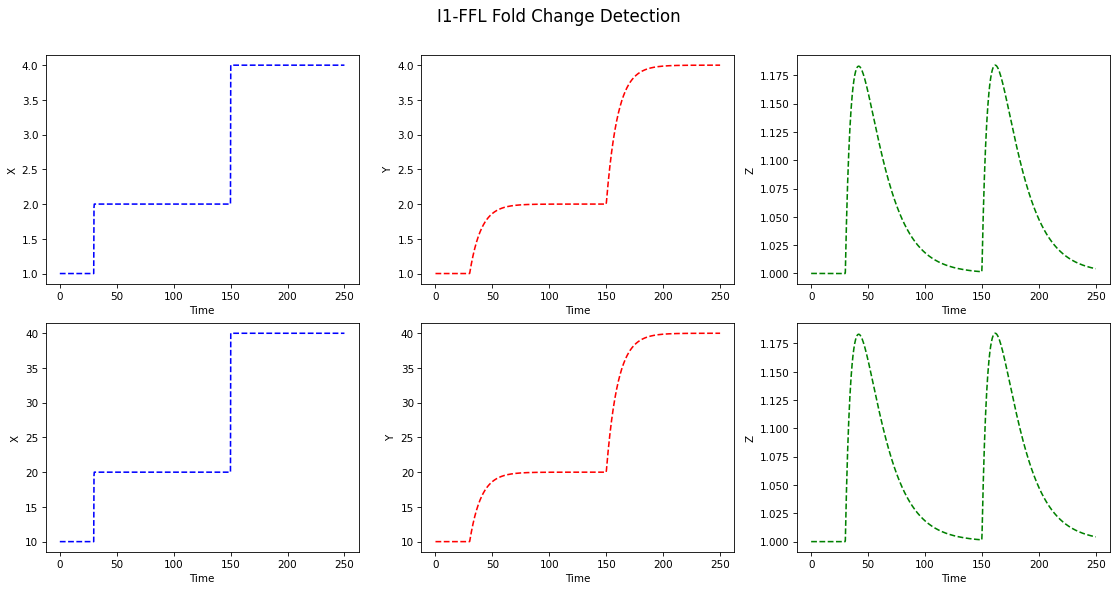

In [ ]:
def example_plot(ax, fontsize=12):
     ax.plot([1, 2])
     ax.locator_params(nbins=3)
     ax.set_xlabel('x-label', fontsize=fontsize)
     ax.set_ylabel('y-label', fontsize=fontsize)
     ax.set_title('Title', fontsize=fontsize)

fig = plt.figure(dpi=75)
fig.set_figheight(8)
fig.set_figwidth(15)

ax1 = plt.subplot2grid((2, 3), (0, 0))
ax2 = plt.subplot2grid((2, 3), (0, 1))
ax3 = plt.subplot2grid((2, 3), (0, 2))
ax4 = plt.subplot2grid((2, 3), (1, 0))
ax5 = plt.subplot2grid((2, 3), (1, 1))
ax6 = plt.subplot2grid((2, 3), (1, 2))

ax1.plot(t, species1[:, 0], 'b--')
ax1.set_xlabel('Time'); ax1.set_ylabel('X');
ax2.plot(t, species1[:, 1], 'r--')
ax2.set_xlabel('Time'); ax2.set_ylabel('Y');
ax3.plot(t, species1[:, 2], 'g--')
ax3.set_xlabel('Time'); ax3.set_ylabel('Z');
fig.suptitle('I1-FFL Fold Change Detection')
ax4.plot(t, species2[:, 0], 'b--')
ax4.set_xlabel('Time'); ax4.set_ylabel('X');
ax5.plot(t, species2[:, 1], 'r--')
ax5.set_xlabel('Time'); ax5.set_ylabel('Y');
ax6.plot(t, species2[:, 2], 'g--')
ax6.set_xlabel('Time'); ax6.set_ylabel('Z');

fig.suptitle('I1-FFL Fold Change Detection', fontsize=16)
plt.tight_layout()
fig.subplots_adjust(top=0.9)